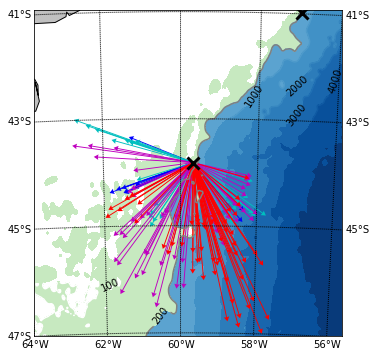

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import scipy.io

#=================================================Load data==========================================================
topo=np.loadtxt('topo.dat')
lat=np.loadtxt('lat.dat')
lon=np.loadtxt('lon.dat')
lats=lat[(lat[:,0]>=-47.1) & (lat[:,0]<=-40)][:,(lon[0,:]>=-64) & (lon[0,:]<=-55.5)]
lons=lon[(lat[:,0]>=-47.1) & (lat[:,0]<=-40)][:,(lon[0,:]>=-64) & (lon[0,:]<=-55.5)]
tops=topo[(lat[:,0]>=-47.1) & (lat[:,0]<=-40)][:,(lon[0,:]>=-64) & (lon[0,:]<=-55.5)]
dcls=[200,1000,2000,3000,4000,5000,6000,7000]
lcls=[100,200]
lbs=[1000,2000,3000,4000,5000,6000,7000]
mat=scipy.io.loadmat('Vcolor.mat')

# Energy flux vectors and quantiles
u=mat['Eu1'][0]
v=mat['Ev1'][0]
q1=mat['q1'][0]
q2=mat['q2'][0]
q3=mat['q3'][0]
q4=mat['q4'][0]

#=================================================Contour Lines================================================================
# Countour lines range 100
lat1=lats[(lats[:,0]>=-47.1) & (lats[:,0]<=-46)][:,(lons[0,:]>=-64) & (lons[0,:]<=-60)]
lon1=lons[(lats[:,0]>=-47.1) & (lats[:,0]<=-46)][:,(lons[0,:]>=-64) & (lons[0,:]<=-60)]
top1=tops[(lats[:,0]>=-47.1) & (lats[:,0]<=-46)][:,(lons[0,:]>=-64) & (lons[0,:]<=-60)]
# Countour lines range 1000-4000
lat2=lats[(lats[:,0]>=-43) & (lats[:,0]<=-41)][:,(lons[0,:]>=-60) & (lons[0,:]<=-56)]
lon2=lons[(lats[:,0]>=-43) & (lats[:,0]<=-41)][:,(lons[0,:]>=-60) & (lons[0,:]<=-56)]
top2=tops[(lats[:,0]>=-43) & (lats[:,0]<=-41)][:,(lons[0,:]>=-60) & (lons[0,:]<=-56)]

#=====================================================Plot===================================================================
plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=-64.,llcrnrlat=-47.,urcrnrlon=-56.,urcrnrlat=-40.9,
            projection='lcc',lat_1=-43,lat_2=-45,lon_0=-60.,
            resolution ='l',area_thresh=1000.)
x, y = m(lons, lats)
m.drawcountries()
m.drawcoastlines()
m.fillcontinents(color='#C0C0C0')
m.drawparallels(np.arange(-47,-40,2),labels=[1,1,0,0])
m.drawmeridians(np.arange(-64,-50,2),labels=[0,0,0,1])
# contour labels
x2, y2 = m(lon2, lat2)
csd = m.contour(x2,y2, top2,levels=dcls,cmap='Blues',vmin=-6000,vmax=6000)
csdf = m.contourf(x,y, tops,levels=dcls,cmap='Blues',vmin=-6000,vmax=6000)
cslf = m.contourf(x,y, tops,levels=lcls,cmap='Greens',vmin=0,vmax=600)
# 200 m contour line
cs2 = m.contour(x,y, tops,levels=[200],colors='grey')
# 100 m contour line
x1, y1 = m(lon1, lat1)
cs1 = m.contour(x1,y1, top1,levels=[100],colors='w')
plt.clabel(csd,lbs,fmt='%d',colors='k')
# cs5 = m.contour(x,y, tops,levels=[5000],colors='#083A7A')
# manual_location5000 = [m(-55, -43)]
# plt.clabel(cs5,fmt='%d',colors='k',manual=manual_location5000)
manual_location1 = [m(-62, -46)]
plt.clabel(cs1,fmt='%d',colors='k',manual=manual_location1)
manual_location2 = [m(-61, -46.5)]
plt.clabel(cs2,fmt='%d',colors='k',manual=manual_location2)
g2x,g2y=m(-59.673,-43.82)
# plt.plot(g2x,g2y,'*k',markersize=12)
plt.plot(g2x,g2y,'xk',mew=3,markersize=12)
t2x,t2y=m(-59.9,-43.8)
g4x,g4y=m(-57.003,-40.987)
# plt.plot(g4x,g4y,'*k',markersize=12)
plt.plot(g4x,g4y,'xk',mew=3,markersize=12)
plt.quiver(g2x,g2y,-u[q1==1],-v[q1==1],color='b',scale=.5,scale_units='inches',width=0.003,headwidth=6)
plt.quiver(g2x,g2y,-u[q2==1],-v[q2==1],color='c',scale=.5,scale_units='inches',width=0.003,headwidth=6)
plt.quiver(g2x,g2y,-u[q3==1],-v[q3==1],color='m',scale=.5,scale_units='inches',width=0.003,headwidth=6)
plt.quiver(g2x,g2y,-u[q4==1],-v[q4==1],color='r',scale=.5,scale_units='inches',width=0.003,headwidth=6)
# plt.savefig('Figure10.eps',dpi=400)
plt.show()